In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
read_malicioso = "/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Novos dados/malicioso.csv"
read_legitimo = "/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Novos dados/legitimo.csv"

legitimo = pd.read_csv(read_legitimo, delimiter="\t")
malicioso = pd.read_csv(read_malicioso, delimiter="\t")

print(legitimo.shape)
print(malicioso.shape)

(24559, 17)
(105981, 17)


<ipython-input-2-8c5958b1a0e9>:5: DtypeWarning: Columns (6,9,11,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  malicioso = pd.read_csv(read_malicioso, delimiter="\t")


In [3]:
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver'],
      dtype='object')


# Analise geral

In [4]:
columns = ['mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos', 'mqtt.ver']
legitimo = legitimo.drop(columns, axis=1)
malicioso = malicioso.drop(columns, axis=1)
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype'],
      dtype='object')


In [5]:
print(legitimo.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype'],
      dtype='object')


In [6]:
legitimo.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0018,0.000000,28,0x30,3
1,0x0018,0.002873,28,0x30,3
2,0x0018,0.002320,2,0xc0,12
3,0x0018,0.002249,2,0xd0,13
4,0x0010,0.065713,0,NaN,NaN


In [7]:
malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0002,0.0,0,NaN,NaN
1,0x0002,0.0,0,NaN,NaN
2,0x0002,0.0,0,NaN,NaN
3,0x0002,0.0,0,NaN,NaN
4,0x0002,0.0,0,NaN,NaN


Tratamento dos campos N/A

In [8]:
legitimo.fillna({'tcp.flags': 0, 'tcp.time_delta': 0, 'tcp.len': 0,'mqtt.hdrflags': 0, 'mqtt.msgtype': 0}, inplace=True)
malicioso.fillna({'tcp.flags': 0, 'tcp.time_delta': 0, 'tcp.len': 0,'mqtt.hdrflags': 0, 'mqtt.msgtype': 0}, inplace=True)
print("executado")

executado


In [9]:
legitimo.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0018,0.000000,28,0x30,3
1,0x0018,0.002873,28,0x30,3
2,0x0018,0.002320,2,0xc0,12
3,0x0018,0.002249,2,0xd0,13
4,0x0010,0.065713,0,0,0


In [10]:
malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype
0,0x0002,0.0,0,0,0
1,0x0002,0.0,0,0,0
2,0x0002,0.0,0,0,0
3,0x0002,0.0,0,0,0
4,0x0002,0.0,0,0,0


In [11]:
# rotulacao
legitimo["target"] = 0
malicioso["target"] = 1
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype', 'target'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.hdrflags',
       'mqtt.msgtype', 'target'],
      dtype='object')


In [12]:
# mistura do arquivo malicioso
# o arquivo precisa ser misturado porque foram usadas duas ferramentas para executar o ataque

from sklearn.model_selection import train_test_split

one, two = train_test_split(malicioso, test_size=0.33, shuffle=True, random_state=42)
# uniao dos arquivos misturados
malicioso = pd.concat([one, two], ignore_index=True)

malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.hdrflags,mqtt.msgtype,target
0,0x0010,6.358300e-05,0,0,0,1
1,0x0018,5.200000e-08,2896,0,0,1
2,0x0010,1.144900e-05,0,0,0,1
3,0x0010,4.805000e-05,0,0,0,1
4,0x0018,-2.550000e-07,2896,0,0,1


# Balanceamento

In [13]:
data_df = pd.concat([legitimo, malicioso], ignore_index=True)

def create_balanced_dataset(df):
    num_spam = df[df['target'] == 0].shape[0] # Pegar quantidade de dados do legitimo
    spam_df = df[df['target'] == 0].copy() # Os dados do legitimo

    ham_df = df[df['target'] == 1].sample(num_spam, random_state=123) # Pegar os dados do malicioso
    return pd.concat([ham_df, spam_df]) # retorna dois dataframes concatenados

data = create_balanced_dataset(data_df) # dado balanceado contendo legitimo

print(data.shape)

(49118, 6)


In [14]:
print(data['target'].value_counts())

target
1    24559
0    24559
Name: count, dtype: int64


In [15]:
print(data['mqtt.hdrflags'].value_counts())

mqtt.hdrflags
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     33341
0xc0                                                                                                                                          

In [16]:
print(data['mqtt.msgtype'].value_counts())

mqtt.msgtype
0                                                                                                                                                                                                                                                                                                                                                33341
12                                                                                                                                                                                                                                                                                                                                                4217
13                                                                                                                                                                                                                                                                                                           

In [17]:
data = data.drop(['mqtt.hdrflags', 'mqtt.msgtype'], axis=1)

In [18]:
data.keys()

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'target'], dtype='object')

In [19]:
data.head()

,tcp.flags,tcp.time_delta,tcp.len,target
126267,0x0010,8.000000e-08,1448,1
45066,0x0010,1.221030e-04,0,1
53564,0x0010,1.943600e-05,0,1
124046,0x0018,3.900000e-08,2896,1
46095,0x0018,3.748162e-02,2896,1


# Tratamento geral

In [20]:
# Removendo letras e vírgulas, mantendo apenas números e pontos
data['tcp.flags'] = data['tcp.flags'].str.replace(r'[^0-9.]', '', regex=True)
data.head()

,tcp.flags,tcp.time_delta,tcp.len,target
126267,00010,8.000000e-08,1448,1
45066,00010,1.221030e-04,0,1
53564,00010,1.943600e-05,0,1
124046,00018,3.900000e-08,2896,1
46095,00018,3.748162e-02,2896,1


# Treinamento

In [21]:
# divisao dos dados para treino e teste
train, test = train_test_split(data, test_size=0.33, shuffle=True, random_state=42)

In [22]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

In [25]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Treinamento

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from lightgbm import LGBMClassifier
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16444, number of negative: 16465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 32909, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499681 -> initscore=-0.001276
[LightGBM] [Info] Start training from score -0.001276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13156, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 26328, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499696 -> initscore=-0.001215
[LightGBM] [Info] Start training from score -0.001215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.9689 ± 0.0018 (valores: [0.9711 0.9667 0.9669 0.9696 0.9699])
[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13156, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 26328, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499696 -> initscore=-0.001215
[LightGBM] [Info] Start training from score -0.001215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Precision: 0.9689 ± 0.0017 (valores: [0.9711 0.9667 0.9669 0.9696 0.9699])
[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001843 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 13156, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 26328, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499696 -> initscore=-0.001215
[LightGBM] [Info] Start training from score -0.001215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Recall: 0.9689 ± 0.0018 (valores: [0.9711 0.9667 0.9669 0.9696 0.9699])
[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 26327, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499677 -> initscore=-0.001291
[LightGBM] [Info] Start training from score -0.001291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 13155, number of negative: 13172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Relatório de Classificação (dados combinados das dobras):
              precision    recall  f1-score   support

           0     0.9717    0.9642    0.9679      8094
           1     0.9645    0.9720    0.9683      8115

    accuracy                         0.9681     16209
   macro avg     0.9681    0.9681    0.9681     16209
weighted avg     0.9681    0.9681    0.9681     16209



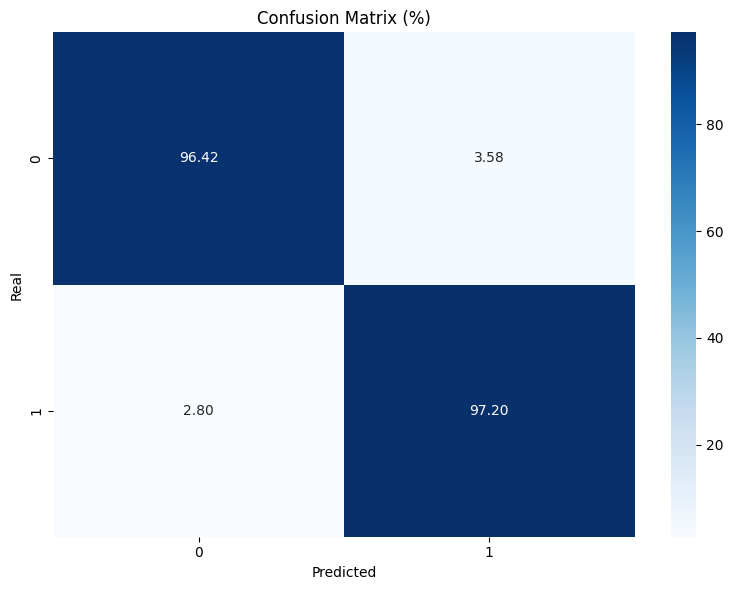


Modelo salvo como 'modelo_lgbm.pkl'


In [27]:
# parâmetros para busca de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}

lgbm = LGBMClassifier(random_state=42)

# validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# busca de hiperparâmetros
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# melhor modelo
best_model = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

# avaliação por validação cruzada
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

print("\nMétricas por dobra da Validação Cruzada (k=5):")
cv_scores = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring=scorer)
    cv_scores[metric_name] = scores
    print(f"{metric_name.capitalize()}: {scores.mean():.4f} ± {scores.std():.4f} (valores: {np.round(scores, 4)})")

# previsões com validação cruzada para relatório e matriz
y_pred = best_model.predict(X_test)

# exibição das métricas
print("\nRelatório de Classificação (dados combinados das dobras):")
print(classification_report(y_test, y_pred, digits=4))

# matriz de confusão em porcentagem
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true') * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# modelo
joblib.dump(best_model, "modelo_lgbm.pkl")
print("\nModelo salvo como 'modelo_lgbm.pkl'")